In [2]:
import pandas as pd

gcf_df = pd.read_csv('./bigscape/output_all-2/gcf_map_0.6.txt', sep='\t')

gcf_df[:5]

,1A2,1A3,1A7,1B1,1B6,1C2,1C3,1C4,1D4,1D5,...,NHHE01,NHHS01,NHIA01,NHII01,NHIK01,NHIL01,NHJC01,NHJU01,NHKA01,PALPB
0,['1A2_011'],0,0,0,0,0,['1C3_012'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,"['1A3_001', '1A3_005']",0,"['1B1_001', '1B1_004', '1B1_006', '1B1_009']",0,"['1C2_009', '1C2_013', '1C2_020', '1C2_024', '...",0,['1C4_002'],"['1D4_041', '1D4_047']","['1D5_001', '1D5_007', '1D5_009', '1D5_011', '...",...,"['NHHE01_001', 'NHHE01_004']","['NHHS01_001', 'NHHS01_005']","['NHIA01_003', 'NHIA01_004']","['NHII01_002', 'NHII01_003']","['NHIK01_002', 'NHIK01_003', 'NHIK01_004', 'NH...","['NHIL01_001', 'NHIL01_002']","['NHJC01_001', 'NHJC01_002']","['NHJU01_001', 'NHJU01_002', 'NHJU01_003', 'NH...","['NHKA01_001', 'NHKA01_002']","['PALPB_001', 'PALPB_002', 'PALPB_003', 'PALPB..."
2,0,['1A3_002'],0,['1B1_021'],0,['1C2_007'],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,['1A7_011'],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,['1B1_016'],0,['1C2_019'],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
gcf_df2 = gcf_df.T

gcf_df2[:5]

,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
1A2,['1A2_011'],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1A3,0,"['1A3_001', '1A3_005']",['1A3_002'],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1A7,0,0,0,['1A7_011'],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1B1,0,"['1B1_001', '1B1_004', '1B1_006', '1B1_009']",['1B1_021'],0,['1B1_016'],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1B6,0,0,0,0,0,['1B6_009'],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
current_list = []
total_list = []
total_counts = []

for i,r in gcf_df2.iterrows():
    for item in r:
        if item != '0':
            current_list.append("GCF" + str(r[r == item].index[0]))
    count = 0
    print current_list
    for item in current_list:
        if item not in total_list:
            count += 1
            total_list.append(item)
    if len(total_counts) != 0:
        summed_count = count + total_counts[-1]
        total_counts.append(summed_count)
    else:
        total_counts.append(count)
    
total_counts

['GCF0']
['GCF0', 'GCF1', 'GCF2']
['GCF0', 'GCF1', 'GCF2', 'GCF3']
['GCF0', 'GCF1', 'GCF2', 'GCF3', 'GCF1', 'GCF2', 'GCF4']
['GCF0', 'GCF1', 'GCF2', 'GCF3', 'GCF1', 'GCF2', 'GCF4', 'GCF5']


[1, 3, 4, 5, 6]

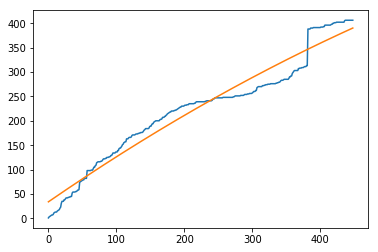

In [128]:
from pylab import *

x = arange(len(total_counts))
p = polyfit(x, total_counts, 2)
a, b, c = p

# plot
x = arange(len(total_counts))
plot(x, total_counts)
plot(x, polyval(p, x))